In [1]:
import apriltag
import cv2
from FR3Py.cameras import RealSenseCamera
camera = RealSenseCamera(VGA=False, enable_imu=False, enable_ir=True, emitter_enabled=False, align_to_color=False)

Enabling streams for camera:  141322250720


In [2]:
ext_params = camera.getExtrinsics()
int_params = camera.getIntrinsics()

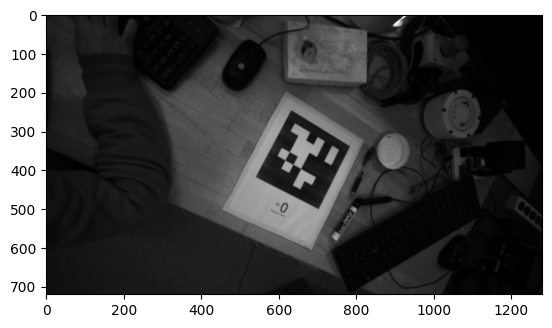

In [3]:
import matplotlib.pyplot as plt
camera.grab_frames()
plt.imshow(camera.ir1_frame,cmap='gray')

In [5]:
from FR3Py.trackers import ApriltagTracker   
tracker = ApriltagTracker(tag_size=0.172, intrinsic_matrix=int_params['IR1']['K'], distortion_coeffs=int_params['IR1']['D'])
tracker.process(camera.ir1_frame)
tracker.getAllTags()

{0: {'corners': array([[541.34869385, 419.19812012],
         [703.62634277, 501.61328125],
         [784.47277832, 340.22595215],
         [633.14434814, 247.45765686]]),
  'center': array([669.24987723, 377.65294059]),
  'pose': array([[ 0.84470298, -0.46220997, -0.26988668,  0.03260099],
         [ 0.47050553,  0.88161068, -0.03724461,  0.01243632],
         [ 0.25514981, -0.09552255,  0.96217151,  0.58225   ],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])}}

In [4]:
from FR3Py.trackers import ApriltagTracker   
tracker = ApriltagTracker(tag_size=0.172, intrinsic_matrix=int_params['RGB']['K'], distortion_coeffs=int_params['RGB']['D'])
tracker.process(camera.color_frame)
tracker.getAllTags()

{0: {'corners': array([[478.48602295, 422.69302368],
         [644.55480957, 504.59170532],
         [726.28417969, 344.56182861],
         [571.43170166, 252.52485657]]),
  'center': array([608.87057662, 381.58254437]),
  'pose': array([[ 0.84513432, -0.4619737 , -0.26893918, -0.02537201],
         [ 0.47190211,  0.88111928, -0.03061386,  0.01556112],
         [ 0.2511103 , -0.10104015,  0.96267051,  0.58381802],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])}}

In [ ]:
camera.close()

In [ ]:
import pyrealsense2 as rs
pc = rs.pointcloud()
points = pc.calculate(frames.get_depth_frame())
pc.map_to(frames.get_depth_frame())
vtx = np.asanyarray(points.get_vertices())
tex = np.asanyarray(points.get_texture_coordinates())
tex